# BTC Price Predictive Model
*Deepak Binkam*

**Part 1: Data Exploration**

In this section, the datasets will be analyzed.

Data Used: [Kaggle Bitcoin Dataset](https://www.kaggle.com/datasets/shahidk3075/bitcoin-price-prediction-dataset?resource=download)

*   Date converted to datetime
*   A target variable "Movement" is created from the data
-   Movement determines if the closing price was higher than the opening price of that day




In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

#df_btc = pd.read_csv('BTC-USD(1).csv')
#df_btctrain = pd.read_csv('bitcoin_price_Training - Training.csv')
btc = pd.read_csv('/content/drive/MyDrive/bitcoinprices/BTC-USD(1).csv')
trainbtc = pd.read_csv('/content/drive/MyDrive/bitcoinprices/bitcoin_price_Training - Training.csv')
df_btc = pd.DataFrame(btc)
df_btctrain = pd.DataFrame(trainbtc)

print("BTC")
print(df_btc.head())
print("Training")
print(df_btctrain.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
BTC
         Date        Open        High         Low       Close   Adj Close  \
0  2014-09-17  465.864014  468.174011  452.421997  457.334015  457.334015   
1  2014-09-18  456.859985  456.859985  413.104004  424.440002  424.440002   
2  2014-09-19  424.102997  427.834991  384.532013  394.795990  394.795990   
3  2014-09-20  394.673004  423.295990  389.882996  408.903992  408.903992   
4  2014-09-21  408.084991  412.425995  393.181000  398.821014  398.821014   

     Volume  
0  21056800  
1  34483200  
2  37919700  
3  36863600  
4  26580100  
Training
           Date     Open     High      Low    Close         Volume  \
0  Jul 31, 2017  2763.24  2889.62  2720.61  2875.34    860,575,000   
1  Jul 30, 2017  2724.39  2758.53  2644.85  2757.18    705,943,000   
2  Jul 29, 2017  2807.02  2808.76  2692.80  2726.45    803,746,000   
3  Jul 28, 2017  2679.73  2897.

In [ ]:
#Conversion of Date to datetime

for df in [df_btctrain, df_btc]:
    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'])
        df.sort_values('Date', inplace=True)

In [ ]:
#Removing commas from numbers (and '-')
df_btctrain['Volume'] = df_btctrain['Volume'].replace(',', '', regex=True)
df_btctrain['Market Cap'] = df_btctrain['Market Cap'].replace(',', '', regex=True)

df_btctrain['Volume'] = df_btctrain['Volume'].replace('-',0).astype(float)
df_btctrain['Market Cap'] = df_btctrain['Market Cap'].replace('-',0).astype(float)

print(df_btc.head())
print(df_btctrain.head())

        Date        Open        High         Low       Close   Adj Close  \
0 2014-09-17  465.864014  468.174011  452.421997  457.334015  457.334015   
1 2014-09-18  456.859985  456.859985  413.104004  424.440002  424.440002   
2 2014-09-19  424.102997  427.834991  384.532013  394.795990  394.795990   
3 2014-09-20  394.673004  423.295990  389.882996  408.903992  408.903992   
4 2014-09-21  408.084991  412.425995  393.181000  398.821014  398.821014   

     Volume  
0  21056800  
1  34483200  
2  37919700  
3  36863600  
4  26580100  
           Date    Open    High     Low   Close  Volume    Market Cap
1555 2013-04-28  135.30  135.98  132.10  134.21     0.0  1.500520e+09
1554 2013-04-29  134.44  147.49  134.00  144.54     0.0  1.491160e+09
1553 2013-04-30  144.00  146.93  134.05  139.00     0.0  1.597780e+09
1552 2013-05-01  139.00  139.89  107.72  116.99     0.0  1.542820e+09
1551 2013-05-02  116.38  125.60   92.28  105.21     0.0  1.292190e+09


Movement Distribution in Training Dataset
Movement
1    838
0    718
Name: count, dtype: int64

Movement Distribution in BTC Dataset
Movement
1    1481
0    1266
Name: count, dtype: int64


<ipython-input-5-cac4fbadbc8c>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Movement', data=df_btctrain, palette='tab10')
<ipython-input-5-cac4fbadbc8c>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Movement', data=df_btc, palette='tab10')


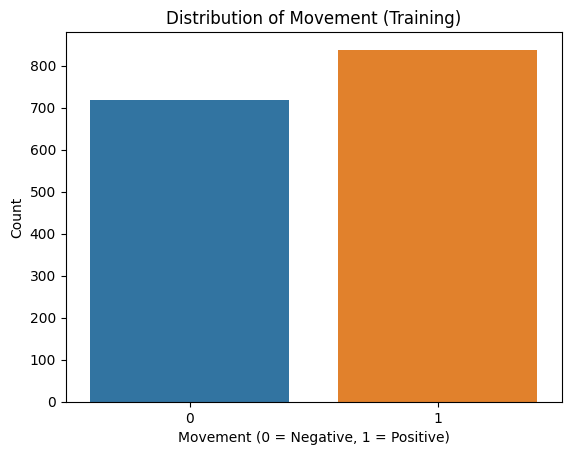

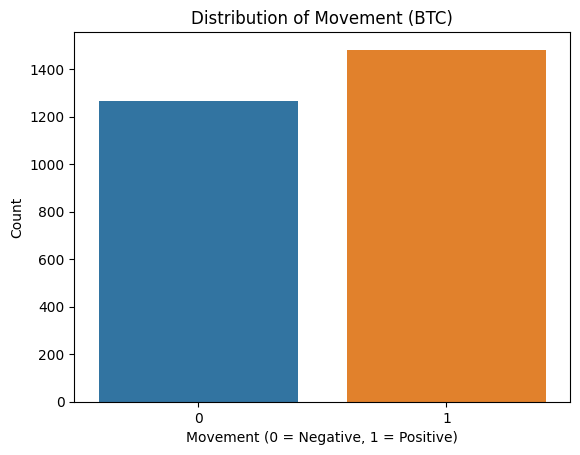

In [ ]:
#Creating Target Variable "Movement" as the Class Variable

for df in [df_btctrain, df_btc]:
    if 'Open' in df.columns and 'Close' in df.columns:
        df['Movement'] = np.where(df['Close'] > df['Open'], 1, 0)

print("Movement Distribution in Training Dataset")
print(df_btctrain['Movement'].value_counts())
print("\nMovement Distribution in BTC Dataset")
print(df_btc['Movement'].value_counts())

plt.figure()
sns.countplot(x='Movement', data=df_btctrain, palette='tab10')
plt.title("Distribution of Movement (Training)")
plt.xlabel("Movement (0 = Negative, 1 = Positive)")
plt.ylabel("Count")

plt.figure()
sns.countplot(x='Movement', data=df_btc, palette='tab10')
plt.title("Distribution of Movement (BTC)")
plt.xlabel("Movement (0 = Negative, 1 = Positive)")
plt.ylabel("Count")


plt.show()

In [ ]:
print('Training Data Breakdown')

print(df_btctrain.describe())

print('BTC Data Breakdown')

print(df_btc.describe())

Training Data Breakdown
                      Date         Open         High          Low  \
count                 1556  1556.000000  1556.000000  1556.000000   
mean   2015-06-14 12:00:00   582.625328   597.992847   567.851446   
min    2013-04-28 00:00:00    68.500000    74.560000    65.530000   
25%    2014-05-21 18:00:00   254.287500   260.327500   248.835000   
50%    2015-06-14 12:00:00   438.600000   447.560000   430.570000   
75%    2016-07-07 06:00:00   662.437500   674.525000   646.735000   
max    2017-07-31 00:00:00  2953.220000  2999.910000  2840.530000   
std                    NaN   523.137312   542.992855   505.877401   

             Close        Volume    Market Cap     Movement  
count  1556.000000  1.556000e+03  1.556000e+03  1556.000000  
mean    584.239396  1.250255e+08  8.694353e+09     0.538560  
min      68.430000  0.000000e+00  7.792550e+08     0.000000  
25%     254.320000  1.458615e+07  3.598355e+09     0.000000  
50%     438.855000  3.275035e+07  6.386210e+

In [ ]:
print('Training Data Info')

print(df_btctrain.info())

print('BTC Data Info')

print(df_btc.info())

Training Data Info
<class 'pandas.core.frame.DataFrame'>
Index: 1556 entries, 1555 to 0
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1556 non-null   datetime64[ns]
 1   Open        1556 non-null   float64       
 2   High        1556 non-null   float64       
 3   Low         1556 non-null   float64       
 4   Close       1556 non-null   float64       
 5   Volume      1556 non-null   float64       
 6   Market Cap  1556 non-null   float64       
 7   Movement    1556 non-null   int64         
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 109.4 KB
None
BTC Data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2747 non-null   datetime64[ns]
 1   Open       2747 non-null   float64       
 2   High       

In [ ]:
print('Training Data Null Values')

print(df_btctrain.isnull().sum())

print('BTC Data Null Values')

print(df_btc.isnull().sum())

Training Data Null Values
Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
Movement      0
dtype: int64
BTC Data Null Values
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Movement     0
dtype: int64


In [ ]:
#Making column names one word
df_btctrain = df_btctrain.rename(columns={'Market Cap': 'MarketCap'})
df_btc = df_btc.rename(columns={'Adj Close': 'AdjClose'})

In [ ]:
print('Training Data Shape and Dtypes')
print(df_btctrain.shape)
print(df_btctrain.dtypes)

print('BTC Data Shape and Dtypes')
print(df_btc.shape)
print(df_btc.dtypes)

Training Data Shape and Dtypes
(1556, 8)
Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Volume              float64
MarketCap           float64
Movement              int64
dtype: object
BTC Data Shape and Dtypes
(2747, 8)
Date        datetime64[ns]
Open               float64
High               float64
Low                float64
Close              float64
AdjClose           float64
Volume               int64
Movement             int64
dtype: object


## Visualizations

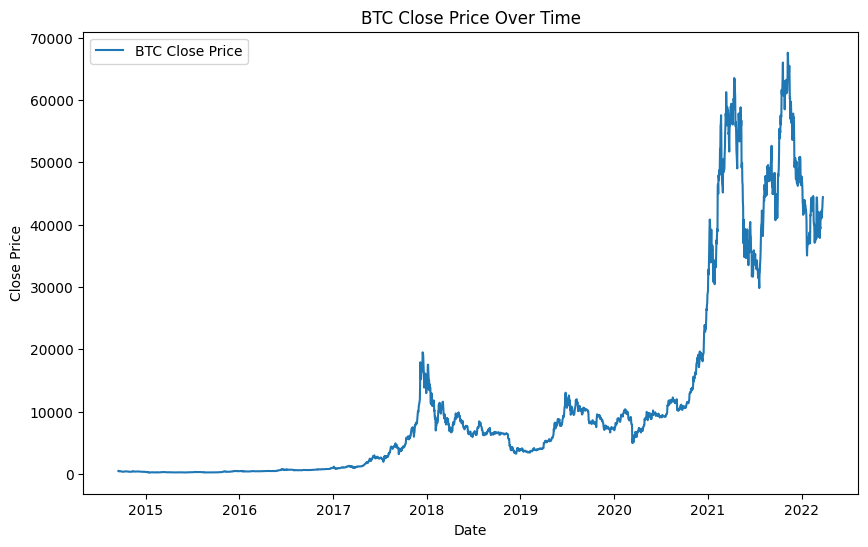

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df_btc['Date'], df_btc['Close'], label='BTC Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('BTC Close Price Over Time')
plt.legend()
plt.show()

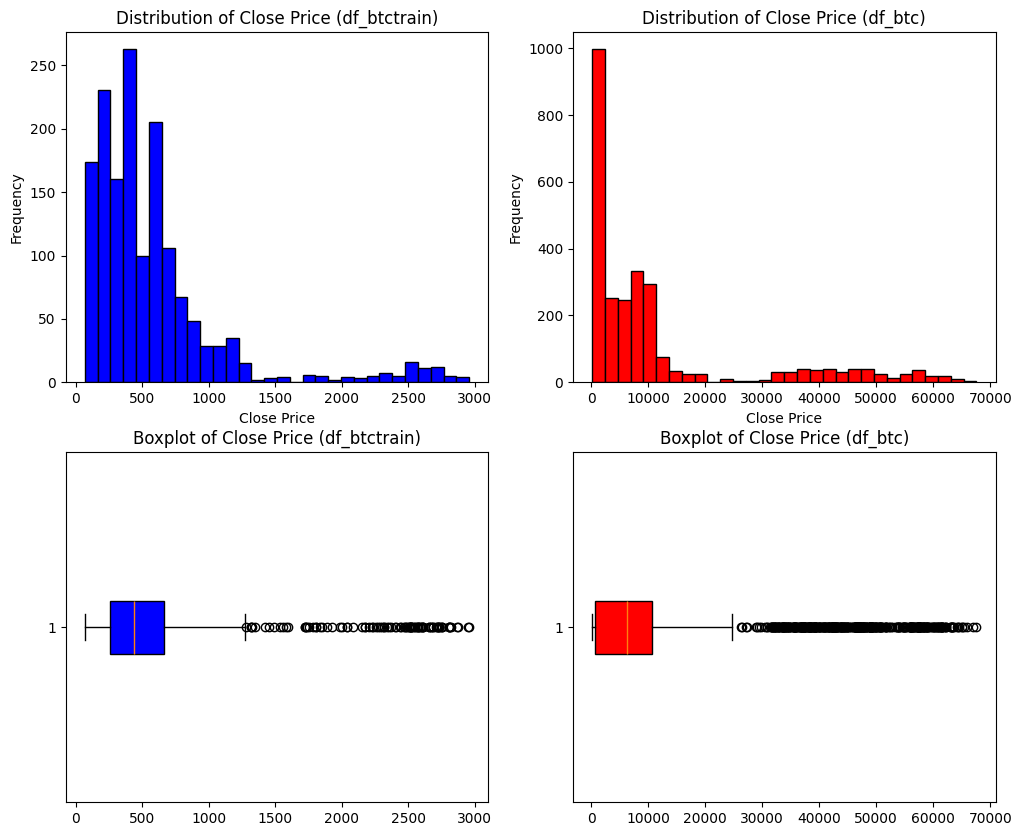

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
plt.hist(df_btctrain['Close'], bins=30, color='blue', edgecolor='black')
plt.title('Distribution of Close Price (df_btctrain)')
plt.xlabel('Close Price')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
plt.hist(df_btc['Close'], bins=30, color='red', edgecolor='black')
plt.title('Distribution of Close Price (df_btc)')
plt.xlabel('Close Price')
plt.ylabel('Frequency')


plt.subplot(2,2,3)
plt.boxplot(df_btctrain['Close'], vert=False, patch_artist=True, boxprops=dict(facecolor='blue'))
plt.title('Boxplot of Close Price (df_btctrain)')

plt.subplot(2,2,4)
plt.boxplot(df_btc['Close'], vert=False, patch_artist=True, boxprops=dict(facecolor='red'))
plt.title('Boxplot of Close Price (df_btc)')
plt.show()
plt.tight_layout()


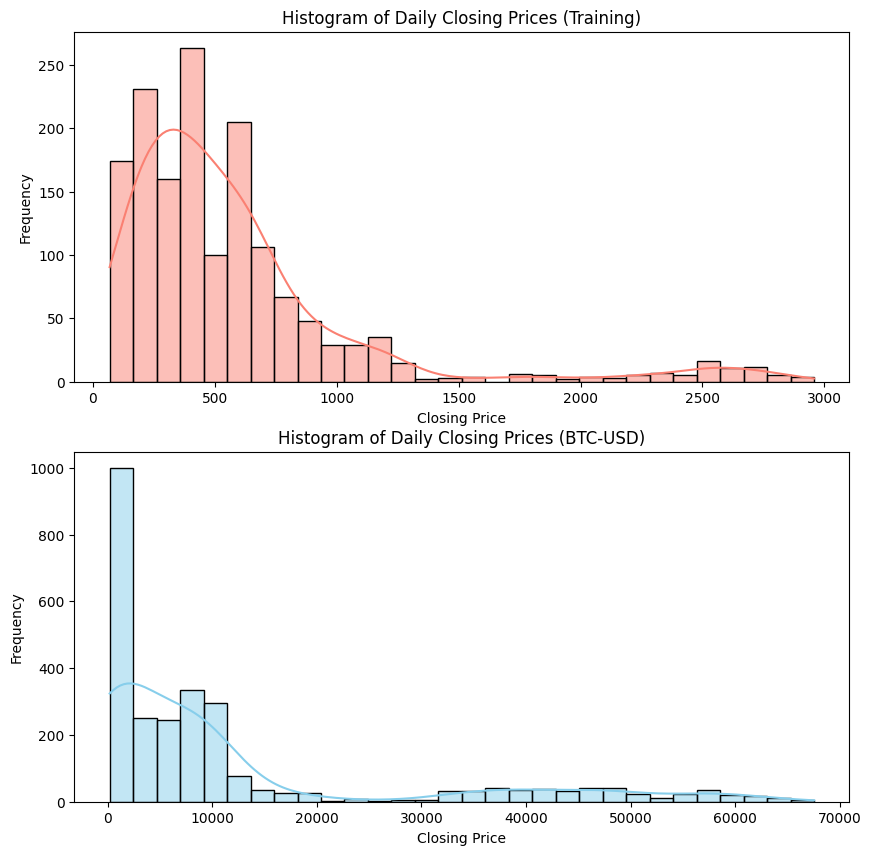

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(10, 10))

plt.subplot(2,1,1)
sns.histplot(df_btctrain['Close'], kde=True, bins=30, color='salmon')
plt.title("Histogram of Daily Closing Prices (Training)")
plt.xlabel("Closing Price")
plt.ylabel("Frequency")

plt.subplot(2,1,2)
sns.histplot(df_btc['Close'], kde=True, bins=30, color='skyblue')
plt.title("Histogram of Daily Closing Prices (BTC-USD)")
plt.xlabel("Closing Price")
plt.ylabel("Frequency")
plt.show()

plt.tight_layout()

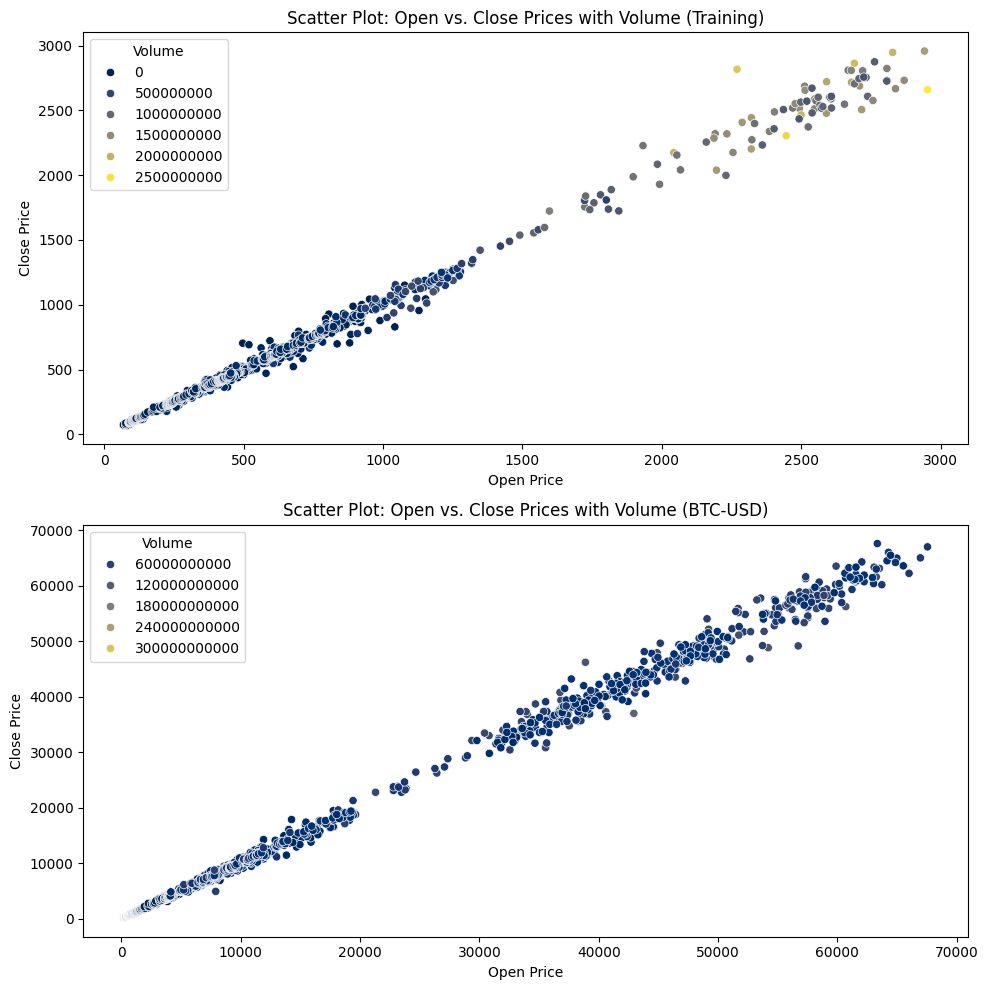

In [ ]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 1, 1)
sns.scatterplot(
    x='Open',
    y='Close',
    hue='Volume',
    palette='cividis',
    data=df_btctrain
)
plt.title("Scatter Plot: Open vs. Close Prices with Volume (Training)")
plt.xlabel("Open Price")
plt.ylabel("Close Price")

plt.subplot(2, 1, 2)
sns.scatterplot(
    x='Open',
    y='Close',
    hue='Volume',
    palette='cividis',
    data=df_btc
)
plt.title("Scatter Plot: Open vs. Close Prices with Volume (BTC-USD)")
plt.xlabel("Open Price")
plt.ylabel("Close Price")

plt.tight_layout()
plt.show()

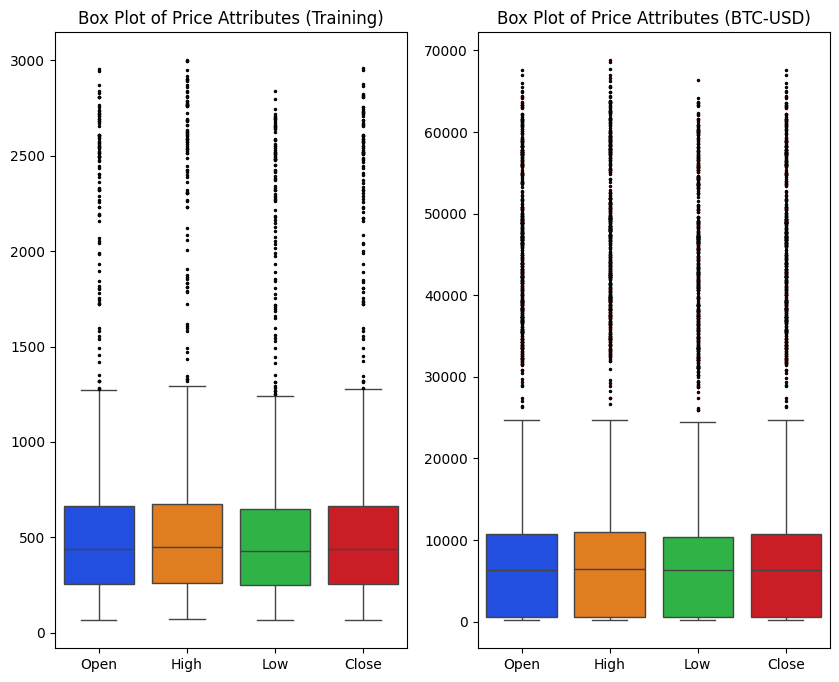

In [ ]:
flierprops = dict(marker='.', markersize=3, markerfacecolor='red', markeredgecolor='black')

plt.figure(figsize=(10,8))

plt.subplot(1,2,1)
sns.boxplot(data=df_btctrain[['Open', 'High', 'Low', 'Close']], flierprops=flierprops, palette='bright')
plt.title("Box Plot of Price Attributes (Training)")


plt.subplot(1,2,2)
sns.boxplot(data=df_btc[['Open', 'High', 'Low', 'Close']], flierprops=flierprops, palette='bright')
plt.title("Box Plot of Price Attributes (BTC-USD)")
plt.show()


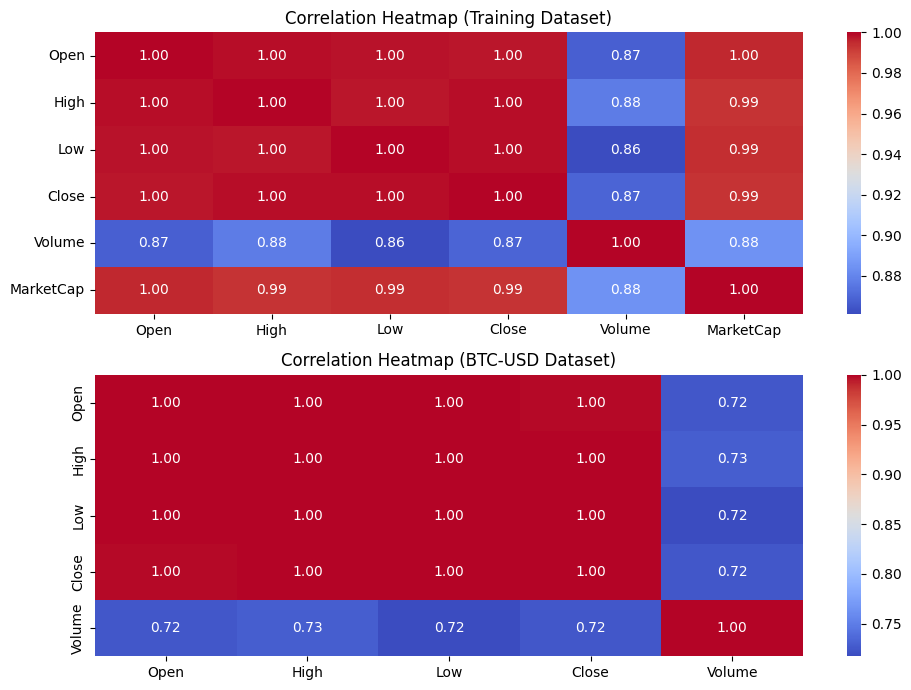

In [ ]:
numeric_cols = ['Open', 'High', 'Low', 'Close', 'Volume', 'MarketCap']
numeric_cols_btc = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.figure(figsize=(10, 7))

plt.subplot(2,1,1)
corr_matrix = df_btctrain[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Training Dataset)")

plt.subplot(2,1,2)
corr_matrix_btc = df_btc[numeric_cols_btc].corr()
sns.heatmap(corr_matrix_btc, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (BTC-USD Dataset)")
plt.tight_layout()
plt.show()

#Models

The three models used in this project will be



1.   Logistic Regression
* Simple model used for binary classification. It models the probability of the target variable being 0 or 1 (True or False), which is the derived 'Movement' column.

2.   Decision Trees
* Can be more useful for non-linear relationships.

3.   k-Nearest Neighbors
* a



##Date
When using only ['Open', 'High', 'Low', 'Volume', 'MarketCap'], the models perform poorly.
I will now include date into the models.


---


To incorporate date into the model, I can use feature extraction and lag features. I also cannot use the standard test_train_split when I want meaning to the order of the data. I can use an ordered split to train.

---

After using feature extraction, lag features, and a rolling mean, the models still struggle to predict anything useful. For kNN and the decision tree, the evaluation of the models was worse, but improved in logistic regression. However, f1 scores have only got better for logistic regression, and no change in the other models.

| Before Date Features | Accuracy | F1-Score |Observations                                                                    |
|-|-|-|-|
| Logistic Regression    | 54%     | 0.70              | Very low recall for class 0.              |
| Decision Tree          | 62.5%   | 0.51              |Balanced|
| k-Nearest Neighbors    | 57%     | 0.46              | Lower accuracy with imbalanced precision/recall.|

| After Date Features | Accuracy | F1-Score| Observations                                                                    |
|-|-|-|-|
| Logistic Regression    | 66%     | 0.78              | Improvement but low recall for class 0|
| Decision Tree          | 52%     | 0.51              | Accuracy has dropped compared to before|
| k-Nearest Neighbors    | 50%     | 0.46              | Also performing worse than before|


In [ ]:
df_btctrain['DayOfWeek'] = df_btctrain['Date'].dt.dayofweek
df_btctrain['Month'] = df_btctrain['Date'].dt.month

df_btctrain['Lag'] = df_btctrain['Close'].shift(1)

df_btctrain['RollingMean'] = df_btctrain['Close'].rolling(window=3).mean()
df_btctrain = df_btctrain.dropna()


df_btctrain = df_btctrain.sort_values('Date')

##Data Splitting

In [ ]:
split_index = int(len(df_btctrain) * 0.8)

train_data = df_btctrain.iloc[:split_index]
test_data = df_btctrain.iloc[split_index:]

In [ ]:
from sklearn.model_selection import train_test_split

X_train = train_data[['Open', 'High', 'Low', 'Volume', 'MarketCap', 'DayOfWeek', 'Month', 'Lag', 'RollingMean']]
y_train = train_data['Movement']
X_test = test_data[['Open', 'High', 'Low', 'Volume', 'MarketCap', 'DayOfWeek', 'Month', 'Lag', 'RollingMean']]
y_test = test_data['Movement']

print("Training shape:", X_train.shape)
print("Test shape:", X_test.shape)

Training shape: (1243, 9)
Test shape: (311, 9)


##Logistic Regression


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)

print("LR Classification Report:")
print(classification_report(y_test, lr_pred))

lr_confusion_matrix = confusion_matrix(y_test, lr_pred)
print("LR Confusion Matrix:")
print(lr_confusion_matrix)

print("LR Accuracy:", accuracy_score(y_test, lr_pred))
print("LR Precision:", precision_score(y_test, lr_pred))
print("LR Recall:", recall_score(y_test, lr_pred))
print("LR F1-score:", f1_score(y_test, lr_pred))

LR Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.15      0.25       118
           1       0.65      0.96      0.78       193

    accuracy                           0.66       311
   macro avg       0.69      0.56      0.51       311
weighted avg       0.68      0.66      0.58       311

LR Confusion Matrix:
[[ 18 100]
 [  7 186]]
LR Accuracy: 0.6559485530546624
LR Precision: 0.6503496503496503
LR Recall: 0.9637305699481865
LR F1-score: 0.7766179540709812


##Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

dt_pred = dt_model.predict(X_test)

print("DT Classification Report:")
print(classification_report(y_test, dt_pred))

dt_confusion_matrix = confusion_matrix(y_test, dt_pred)
print("DT Confusion Matrix:")
print(dt_confusion_matrix)

print("DT Accuracy:", accuracy_score(y_test, dt_pred))
print("DT Precision:", precision_score(y_test, dt_pred))
print("DT Recall:", recall_score(y_test, dt_pred))
print("DT F1-score:", f1_score(y_test, dt_pred))

DT Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.71      0.53       118
           1       0.69      0.40      0.51       193

    accuracy                           0.52       311
   macro avg       0.56      0.56      0.52       311
weighted avg       0.59      0.52      0.51       311

DT Confusion Matrix:
[[ 84  34]
 [116  77]]
DT Accuracy: 0.5176848874598071
DT Precision: 0.6936936936936937
DT Recall: 0.39896373056994816
DT F1-score: 0.506578947368421


##kNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

knn_pred = knn_model.predict(X_test_scaled)

print("knn Classification Report:")
print(classification_report(y_test, knn_pred))

knn_confusion_matrix = confusion_matrix(y_test, knn_pred)
print("knn Confusion Matrix:")
print(knn_confusion_matrix)

print("knn Accuracy:", accuracy_score(y_test, knn_pred))
print("knn Precision:", precision_score(y_test, knn_pred))
print("knn Recall:", recall_score(y_test, knn_pred))
print("knn F1-score:", f1_score(y_test, knn_pred))

knn Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.75      0.53       118
           1       0.69      0.34      0.46       193

    accuracy                           0.50       311
   macro avg       0.55      0.55      0.50       311
weighted avg       0.59      0.50      0.49       311

knn Confusion Matrix:
[[ 89  29]
 [127  66]]
knn Accuracy: 0.4983922829581994
knn Precision: 0.6947368421052632
knn Recall: 0.34196891191709844
knn F1-score: 0.4583333333333333


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

param_grid_dt = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42),
                       param_grid=param_grid_dt,
                       scoring='f1',
                       cv=5)
dt_grid.fit(X_train, y_train)

best_dt = dt_grid.best_estimator_
dt_pred_tuned = best_dt.predict(X_test)




dt_accuracy = accuracy_score(y_test, dt_pred_tuned)
dt_precision = precision_score(y_test, dt_pred_tuned)
dt_recall = recall_score(y_test, dt_pred_tuned)
dt_f1 = f1_score(y_test, dt_pred_tuned)

print("Fine Tuning Decision Tree Results:")
print("Best Parameters:", dt_grid.best_params_)
print("Decision Tree Accuracy: {:.2f}".format(dt_accuracy))
print("Decision Tree Precision: {:.2f}".format(dt_precision))
print("Decision Tree Recall: {:.2f}".format(dt_recall))
print("Decision Tree F1-Score: {:.2f}".format(dt_f1))
print("Decision Tree Classification Report:")
print(classification_report(y_test, dt_pred_tuned))
print("Decision Tree Confusion Matrix:")
print(confusion_matrix(y_test, dt_pred_tuned))


Fine Tuning Decision Tree Results:
Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}
Decision Tree Accuracy: 0.52
Decision Tree Precision: 0.65
Decision Tree Recall: 0.48
Decision Tree F1-Score: 0.55
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.58      0.48       118
           1       0.65      0.48      0.55       193

    accuracy                           0.52       311
   macro avg       0.53      0.53      0.52       311
weighted avg       0.56      0.52      0.52       311

Decision Tree Confusion Matrix:
[[ 69  49]
 [101  92]]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}

knn_grid = GridSearchCV(KNeighborsClassifier(),
                        param_grid=param_grid_knn,
                        scoring='f1',
                        cv=5)
knn_grid.fit(X_train_scaled, y_train)

best_knn = knn_grid.best_estimator_
knn_pred_tuned = best_knn.predict(X_test_scaled)





knn_accuracy = accuracy_score(y_test, knn_pred_tuned)
knn_precision = precision_score(y_test, knn_pred_tuned)
knn_recall = recall_score(y_test, knn_pred_tuned)
knn_f1 = f1_score(y_test, knn_pred_tuned)

print("Fine Tuning k-NN Results:")
print("Best Parameters:", knn_grid.best_params_)
print("k-NN Accuracy: {:.2f}".format(knn_accuracy))
print("k-NN Precision: {:.2f}".format(knn_precision))
print("k-NN Recall: {:.2f}".format(knn_recall))
print("k-NN F1-Score: {:.2f}".format(knn_f1))
print("k-NN Classification Report:")
print(classification_report(y_test, knn_pred_tuned))
print("k-NN Confusion Matrix:")
print(confusion_matrix(y_test, knn_pred_tuned))


Fine Tuning k-NN Results:
Best Parameters: {'n_neighbors': 7, 'weights': 'distance'}
k-NN Accuracy: 0.50
k-NN Precision: 0.71
k-NN Recall: 0.33
k-NN F1-Score: 0.45
k-NN Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.78      0.54       118
           1       0.71      0.33      0.45       193

    accuracy                           0.50       311
   macro avg       0.56      0.55      0.49       311
weighted avg       0.60      0.50      0.48       311

k-NN Confusion Matrix:
[[ 92  26]
 [130  63]]
